# SSRP Instructor notebook for pandas section 

* Date: D4-June 17,2021
* pandas docs: https://pandas.pydata.org/docs/



In [1]:
import pandas as pd

Read Covid data into data frame

In [2]:
covid_live_counties=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')

In [3]:
covid_live_counties

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2021-06-14,Autauga,Alabama,1001.0,7215,113.0,6043.0,101.0,1172.0,12.0
1,2021-06-14,Baldwin,Alabama,1003.0,21774,313.0,15308.0,236.0,6466.0,77.0
2,2021-06-14,Barbour,Alabama,1005.0,2345,59.0,1314.0,41.0,1031.0,18.0
3,2021-06-14,Bibb,Alabama,1007.0,2673,64.0,2143.0,40.0,530.0,24.0
4,2021-06-14,Blount,Alabama,1009.0,6925,139.0,5290.0,115.0,1635.0,24.0
...,...,...,...,...,...,...,...,...,...,...
3242,2021-06-14,Sweetwater,Wyoming,56037.0,4636,39.0,4415.0,NaN,221.0,NaN
3243,2021-06-14,Teton,Wyoming,56039.0,3794,11.0,3705.0,NaN,89.0,NaN
3244,2021-06-14,Uinta,Wyoming,56041.0,2298,13.0,1966.0,NaN,332.0,NaN
3245,2021-06-14,Washakie,Wyoming,56043.0,924,26.0,724.0,NaN,200.0,NaN


We've got 3246 observations (rows) and 10 features per observations

In [4]:
covid_live_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              3247 non-null   object 
 1   county            3247 non-null   object 
 2   state             3247 non-null   object 
 3   fips              3216 non-null   float64
 4   cases             3247 non-null   int64  
 5   deaths            3169 non-null   float64
 6   confirmed_cases   2214 non-null   float64
 7   confirmed_deaths  1504 non-null   float64
 8   probable_cases    1942 non-null   float64
 9   probable_deaths   1045 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 253.8+ KB


In [5]:
print(covid_live_counties.columns)

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths', 'confirmed_cases',
       'confirmed_deaths', 'probable_cases', 'probable_deaths'],
      dtype='object')


In [6]:
print(covid_live_counties.describe())

               fips         cases  ...  probable_cases  probable_deaths
count   3216.000000  3.247000e+03  ...     1942.000000      1045.000000
mean   31489.679415  1.029537e+04  ...     1215.347065        28.948325
std    16357.537531  3.951124e+04  ...     2942.763320       188.124819
min     1001.000000  0.000000e+00  ...        0.000000         0.000000
25%    19038.500000  1.056000e+03  ...      131.250000         2.000000
50%    30028.000000  2.527000e+03  ...      384.500000         8.000000
75%    46119.500000  6.496500e+03  ...     1033.250000        20.000000
max    78030.000000  1.246974e+06  ...    46064.000000      5078.000000

[8 rows x 7 columns]


### Selecting values

Selecting by row/ column number

In [7]:
print(covid_live_counties.iloc[0,1])

Autauga


Selecting by entry label

In [8]:
print(covid_live_counties.loc[0, 'state'])

Alabama


### Slicing columns

We can select a subset of features. For example, if we only want county, state, cases, confirmed cases. 

In [9]:
covid_live_counties[['county','state','cases','confirmed_cases', 'deaths']]

,county,state,cases,confirmed_cases,deaths
0,Autauga,Alabama,7215,6043.0,113.0
1,Baldwin,Alabama,21774,15308.0,313.0
2,Barbour,Alabama,2345,1314.0,59.0
3,Bibb,Alabama,2673,2143.0,64.0
4,Blount,Alabama,6925,5290.0,139.0
...,...,...,...,...,...
3242,Sweetwater,Wyoming,4636,4415.0,39.0
3243,Teton,Wyoming,3794,3705.0,11.0
3244,Uinta,Wyoming,2298,1966.0,13.0
3245,Washakie,Wyoming,924,724.0,26.0


It looks like what we want so we store this result into a variable

In [10]:
covid_live_counties_simple = covid_live_counties[['county','state','cases','confirmed_cases','deaths']]

### Slicing rows

By row number with iloc

In [11]:
covid_live_counties_simple.iloc[0:10] # equivalent to covid_live_counties_simple.iloc[5:10,:]

,county,state,cases,confirmed_cases,deaths
0,Autauga,Alabama,7215,6043.0,113.0
1,Baldwin,Alabama,21774,15308.0,313.0
2,Barbour,Alabama,2345,1314.0,59.0
3,Bibb,Alabama,2673,2143.0,64.0
4,Blount,Alabama,6925,5290.0,139.0
5,Bullock,Alabama,1242,1097.0,42.0
6,Butler,Alabama,2233,2009.0,71.0
7,Calhoun,Alabama,14692,10965.0,325.0
8,Chambers,Alabama,3715,1857.0,123.0
9,Cherokee,Alabama,1872,1189.0,45.0


Applying operations to slices

In [12]:
covid_live_counties_simple.loc[0:10, 'deaths'].max()

325.0

Using a conditional statement with loc. For example, let's select california

In [13]:
covid_live_counties_simple['state']

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3242    Wyoming
3243    Wyoming
3244    Wyoming
3245    Wyoming
3246    Wyoming
Name: state, Length: 3247, dtype: object

Selecting a column returns a Series. We can test entry by entry whether a condition is satisfied

In [14]:
covid_live_counties_simple['state']=='California'

0       False
1       False
2       False
3       False
4       False
        ...  
3242    False
3243    False
3244    False
3245    False
3246    False
Name: state, Length: 3247, dtype: bool

Another way of doing the above is with the '.' selection method for columns. With the benefit that columns can be autocompleted in notebook environments.

In [15]:
covid_live_counties_simple.state=='California'

0       False
1       False
2       False
3       False
4       False
        ...  
3242    False
3243    False
3244    False
3245    False
3246    False
Name: state, Length: 3247, dtype: bool

Below we can make sure that both methods result in the same output by comparing the results, and using the `.all()` method for pandas series.

In [16]:
((covid_live_counties_simple.state=='California') == (covid_live_counties_simple['state']=='California')).all()

True

This Series of booleans is appropriate for slicing with `.loc`

In [17]:
covid_live_counties_simple.loc[covid_live_counties_simple['state']=='California']

,county,state,cases,confirmed_cases,deaths
186,Alameda,California,89408,89408.0,1719.0
187,Alpine,California,89,88.0,0.0
188,Amador,California,3720,3720.0,47.0
189,Butte,California,12576,12576.0,194.0
190,Calaveras,California,2195,2189.0,56.0
191,Colusa,California,2276,1965.0,18.0
192,Contra Costa,California,70328,70328.0,810.0
193,Del Norte,California,1448,1448.0,8.0
194,El Dorado,California,10334,10320.0,115.0
195,Fresno,California,102783,102783.0,1720.0


In [18]:
covid_live_counties_simple_CA = covid_live_counties_simple.loc[covid_live_counties_simple['state']=='California']

Let's plot!

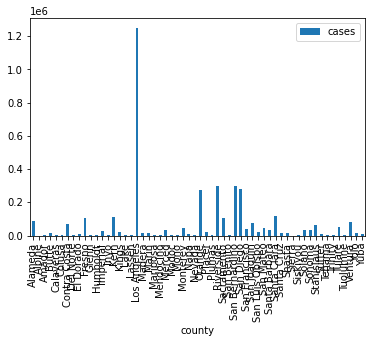

In [19]:
covid_live_counties_simple_CA.plot.bar(x='county',y='cases')

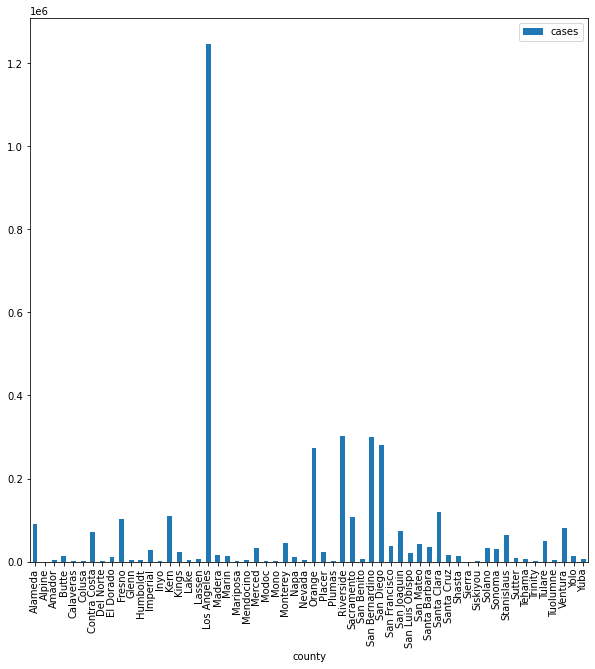

In [21]:
covid_live_counties_simple_CA.plot.bar(x='county',y='cases', figsize=(10,10)) # Now the plot is more readable!

Let's add another column taking the log10 of cases to make it easier to visualize across California counties.

In [22]:
import numpy as np
# a bit more on numpy tomorrow.

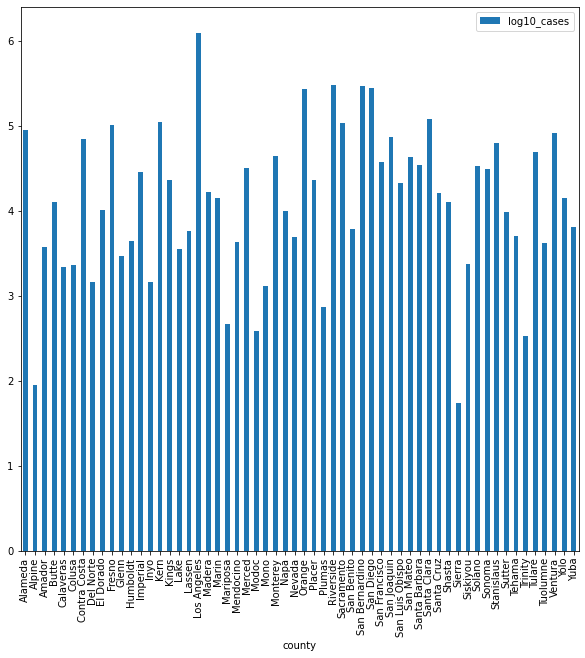

In [23]:
covid_live_counties_simple_CA = pd.DataFrame(covid_live_counties_simple_CA) # this step makes a deep copy of the data frame
covid_live_counties_simple_CA['log10_cases'] = np.log10(covid_live_counties_simple_CA['cases'])
covid_live_counties_simple_CA.plot.bar(x='county',y='log10_cases', figsize=(10,10))

### Sorting and filtering by rank

In [24]:
covid_live_counties_simple_CA.sort_values('cases', ascending=False)

,county,state,cases,confirmed_cases,deaths,log10_cases
204,Los Angeles,California,1246974,1246307.0,24434.0,6.095857
218,Riverside,California,301312,301312.0,4618.0,5.479016
221,San Bernardino,California,298976,298976.0,4788.0,5.475636
222,San Diego,California,281266,281266.0,3770.0,5.449117
215,Orange,California,272650,255588.0,5103.0,5.435606
228,Santa Clara,California,119894,119894.0,2176.0,5.078797
200,Kern,California,110604,110604.0,1400.0,5.043771
219,Sacramento,California,107198,107198.0,1718.0,5.030187
195,Fresno,California,102783,102783.0,1720.0,5.011921
186,Alameda,California,89408,89408.0,1719.0,4.951376


Let's get the top 20 counties

In [25]:
covid_live_counties_simple_CA_top20=covid_live_counties_simple_CA.sort_values('cases', ascending=False).head(20)
covid_live_counties_simple_CA_top20

,county,state,cases,confirmed_cases,deaths,log10_cases
204,Los Angeles,California,1246974,1246307.0,24434.0,6.095857
218,Riverside,California,301312,301312.0,4618.0,5.479016
221,San Bernardino,California,298976,298976.0,4788.0,5.475636
222,San Diego,California,281266,281266.0,3770.0,5.449117
215,Orange,California,272650,255588.0,5103.0,5.435606
228,Santa Clara,California,119894,119894.0,2176.0,5.078797
200,Kern,California,110604,110604.0,1400.0,5.043771
219,Sacramento,California,107198,107198.0,1718.0,5.030187
195,Fresno,California,102783,102783.0,1720.0,5.011921
186,Alameda,California,89408,89408.0,1719.0,4.951376


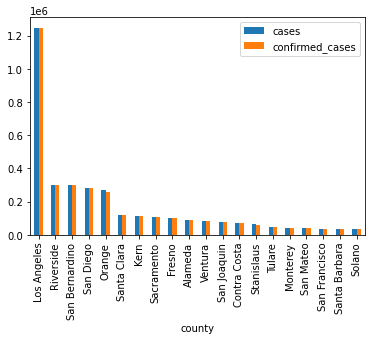

In [26]:
covid_live_counties_simple_CA_top20.plot.bar(x='county', y=['cases','confirmed_cases'])

In [27]:
covid_live_counties_simple_CA_top20.mean()

cases              173101.700000
confirmed_cases    171888.200000
deaths               2943.750000
log10_cases             5.004251
dtype: float64

In [28]:
covid_live_counties_simple_CA_top20.sum()

county             Los AngelesRiversideSan BernardinoSan DiegoOra...
state              CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
cases                                                        3462034
confirmed_cases                                          3.43776e+06
deaths                                                         58875
log10_cases                                                  100.085
dtype: object

In [29]:
covid_live_counties.sum()

date                2021-06-142021-06-142021-06-142021-06-142021-0...
county              AutaugaBaldwinBarbourBibbBlountBullockButlerCa...
state               AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...
fips                                                      1.01271e+08
cases                                                        33429075
deaths                                                         599781
confirmed_cases                                           2.17664e+07
confirmed_deaths                                               380300
probable_cases                                             2.3602e+06
probable_deaths                                                 30251
dtype: object

## Groupby
This method allows aggregation for a specific categorical variable, for example `state`.

In [30]:
group_by_state=covid_live_counties_simple.groupby('state')

The `.count()` method provides counts for each of the states. Because, each entry corresponds to a county, the resulting values will simply provide how many counties are in that state.

In [31]:
group_by_state.count().head()

,county,cases,confirmed_cases,deaths
state,,,,
Alabama,67,67,67,67
Alaska,28,28,0,28
Arizona,15,15,0,15
Arkansas,76,76,76,76
California,58,58,58,58


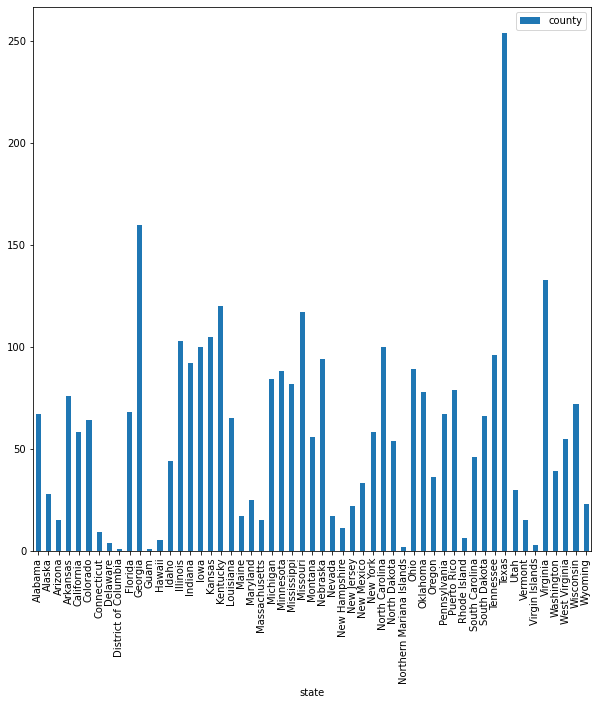

In [32]:
group_by_state.count().plot.bar(y='county', figsize=(10,10))

We can use the `.get_group()` method to filter the data frame for a single group.

In [33]:
group_by_state.get_group('New York').head()

,county,state,cases,confirmed_cases,deaths
1846,Albany,New York,24694,24694.0,356.0
1847,Allegany,New York,3555,3555.0,87.0
1848,Broome,New York,18616,18616.0,366.0
1849,Cattaraugus,New York,5720,5720.0,91.0
1850,Cayuga,New York,6337,6337.0,92.0


And we can use the `.head(n)` method to return `n` entries per group.

In [34]:
group_by_state.head(3)

,county,state,cases,confirmed_cases,deaths
0,Autauga,Alabama,7215,6043.0,113.0
1,Baldwin,Alabama,21774,15308.0,313.0
2,Barbour,Alabama,2345,1314.0,59.0
67,Aleutians East Borough,Alaska,367,NaN,3.0
68,Aleutians West Census Area,Alaska,710,NaN,0.0
...,...,...,...,...,...
3153,Ashland,Wisconsin,1396,1287.0,15.0
3154,Barron,Wisconsin,6043,5882.0,84.0
3224,Albany,Wyoming,4564,4023.0,15.0
3225,Big Horn,Wyoming,1197,965.0,34.0


We can also use the `.sort_values()` method to re-order the rows according to one of our columns, let's do 'cases'.

In [35]:
group_by_state.get_group('New York').sort_values('cases', ascending=False).head()

,county,state,cases,confirmed_cases,deaths
1874,New York City,New York,952559,937240.0,33344.0
1893,Suffolk,New York,200989,200989.0,3400.0
1873,Nassau,New York,183601,183601.0,3174.0
1901,Westchester,New York,129644,129644.0,2289.0
1859,Erie,New York,89564,89564.0,1806.0


Apply summary operation to a groupby object. Applying the `.max()` will attempt to find the max value for each column.



In [36]:
group_by_state.max().head()

,county,cases,confirmed_cases,deaths
state,,,,
Alabama,Winston,80802,70405.0,1563.0
Alaska,Yukon-Koyukuk Census Area,30685,NaN,174.0
Arizona,Yuma,554636,NaN,10157.0
Arkansas,Yell,40235,34449.0,669.0
California,Yuba,1246974,1246307.0,24434.0


Note, however, that entries for each row are now unliked, that is, Yuba county in California did not have 1245788 cases, simly that applying 'max' to the column 'county' returns the maximum value of the strings in that column (i.e. Yuba > San Francisco).

Finally, lets select the top two counties per state and plot the counts. To accomplish this, we will need a series of operations.

In [37]:
n_counties = 2
top_counties_by_state = covid_live_counties_simple.sort_values(['cases'], ascending=[False]).groupby('state').head(n_counties)
top_counties_by_state

,county,state,cases,confirmed_cases,deaths
204,Los Angeles,California,1246974,1246307.0,24434.0
1874,New York City,New York,952559,937240.0,33344.0
615,Cook,Illinois,555850,NaN,10978.0
102,Maricopa,Arizona,554636,NaN,10157.0
364,Miami-Dade,Florida,497726,NaN,6472.0
...,...,...,...,...,...
2917,Rutland,Vermont,2280,NaN,20.0
3057,St. Thomas,Virgin Islands,2025,2025.0,17.0
3055,St. Croix,Virgin Islands,1418,1418.0,10.0
2058,Saipan,Northern Mariana Islands,181,181.0,2.0


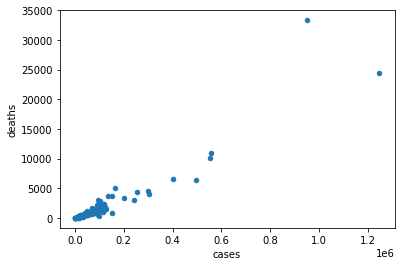

In [38]:
top_counties_by_state.plot.scatter(x='cases',y='deaths')

## Lets directly compute the Case-Fatality Rate by state

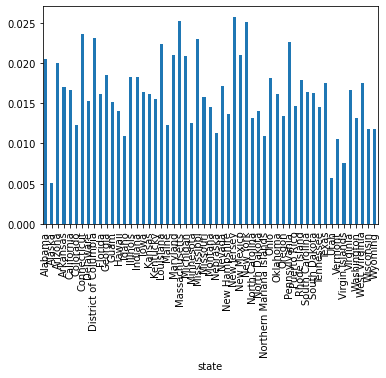

In [40]:
totals_by_state = group_by_state.sum()
cfr = totals_by_state.deaths/totals_by_state.cases
cfr.plot.bar()

# Other examples / exercises

Time evolution in California

In [41]:
covid_history=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [42]:
covid_history.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Data types?

In [43]:
covid_history.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

We want the date to be represented as a date, not a string

In [44]:
pd.to_datetime(covid_history['date'], infer_datetime_format=True)


0       2020-01-21
1       2020-01-22
2       2020-01-23
3       2020-01-24
4       2020-01-24
           ...    
25749   2021-06-13
25750   2021-06-13
25751   2021-06-13
25752   2021-06-13
25753   2021-06-13
Name: date, Length: 25754, dtype: datetime64[ns]

In [45]:
covid_history['date']=pd.to_datetime(covid_history['date'], infer_datetime_format=True)

In [46]:
covid_history.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

## Changing index

In [47]:
covid_history_ca = covid_history.loc[covid_history['state']=='California']

In [48]:
covid_history_ca

,date,state,fips,cases,deaths
5,2020-01-25,California,6,1,0
9,2020-01-26,California,6,2,0
13,2020-01-27,California,6,2,0
17,2020-01-28,California,6,2,0
21,2020-01-29,California,6,2,0
...,...,...,...,...,...
25483,2021-06-09,California,6,3799010,63611
25538,2021-06-10,California,6,3800049,63647
25593,2021-06-11,California,6,3801031,63684
25648,2021-06-12,California,6,3801639,63576


Remove the state column

In [49]:
covid_history_ca=covid_history_ca.drop('state', axis=1)

In [50]:
covid_history_ca.head()

,date,fips,cases,deaths
5,2020-01-25,6,1,0
9,2020-01-26,6,2,0
13,2020-01-27,6,2,0
17,2020-01-28,6,2,0
21,2020-01-29,6,2,0


Change the index to date

In [51]:
covid_history_ca = covid_history_ca.set_index('date')
covid_history_ca.head()

,fips,cases,deaths
date,,,
2020-01-25,6,1,0
2020-01-26,6,2,0
2020-01-27,6,2,0
2020-01-28,6,2,0
2020-01-29,6,2,0


In [52]:

#import matplotlib as mp

Plot time evolution

In [53]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd23e9e90>,
      dtype=object)

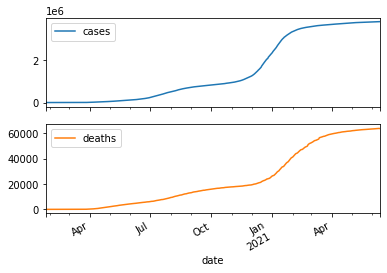

In [54]:
covid_history_ca.reset_index().plot.line(x='date',y=['cases','deaths'], subplots=True)

## Adding column to dataframe

In [55]:
x= covid_history_ca['deaths']/covid_history_ca['cases']*100

Text(0, 0.5, 'Deaths per 100 cases')

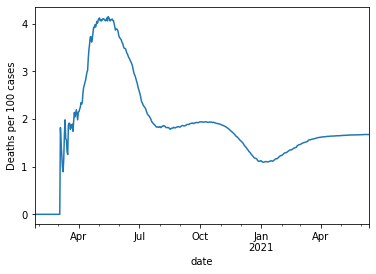

In [56]:
ax=x.plot.line()
ax.set_ylabel('Deaths per 100 cases')

In [57]:
covid_history_ca['percent_death']=x

In [58]:
covid_history_ca.head()

,fips,cases,deaths,percent_death
date,,,,
2020-01-25,6,1,0,0.0
2020-01-26,6,2,0,0.0
2020-01-27,6,2,0,0.0
2020-01-28,6,2,0,0.0
2020-01-29,6,2,0,0.0


## Session 2: More Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd1974990>]],
      dtype=object)

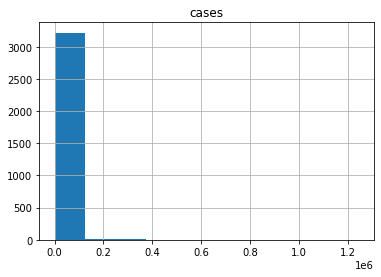

In [63]:
# Too many counties have 0 cases!
covid_live_counties.hist(column='cases')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd1d170d0>]],
      dtype=object)

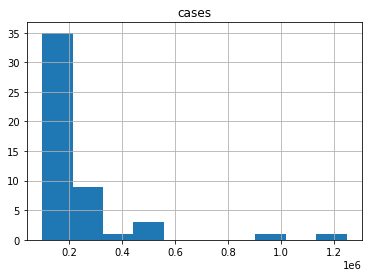

In [64]:
# SElect top 50 counties
covid_live_counties_top50=covid_live_counties.sort_values('cases', ascending=False).head(50)
covid_live_counties_top50.hist(column='cases')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


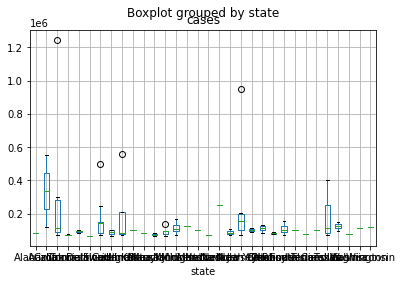

In [65]:
# Group by State
# Select top 100 counties
covid_live_counties_top100=covid_live_counties.sort_values('cases', ascending=False).head(100)
covid_live_counties_top100.boxplot(column='cases', by='state')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number of Cases')

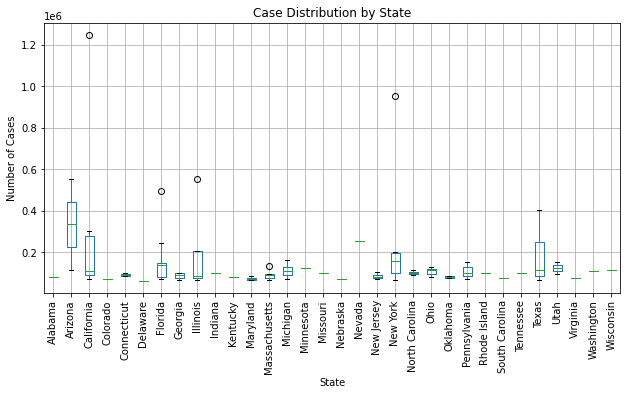

In [67]:
from matplotlib import pyplot as plt 

# Looks ugly! Let's make it more pretty
axes = covid_live_counties_top100.boxplot(column='cases', by='state',figsize=(10,5))
fig = axes.get_figure()
fig.suptitle('')
plt.xticks(rotation=90)
plt.title('Case Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Cases')